# Problem Statement
In this problem, we want to study the orbit of a comet, whose <a href='https://en.wikipedia.org/wiki/Astrometry'>astrometry</a> data is provided. For this problem, make the following three important simplifying assumptions -
<ol><li> The orbit of the earth is perfectly circular with radius = 1<a href='https://en.wikipedia.org/wiki/Astronomical_unit'>AU</a> and time period = 1 year</li>
    <li> The orbit of the comet is coplanar to the orbit of the earth </li>
    <li> Gravitational effects of the earth on the comet can be neglected</li>
</ol>
As usual, <a href='https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion'>Kepler's laws of planetary motion</a> are obeyed by all orbits.
An astronomer (sitting on earth, naturally) has measured the distance of a certain comet from earth and the angle between the comet and the sun, as seen from earth (where a negative sign indicates that the comet is to the west of the sun). The time of observation after the first observation (in years), distance between earth and the comet (in AU) and the angle between the sun and the comet (in radians) is given in the data file CometData.csv. 

Your task, should you choose to attempt this problem, is to help the astronomer to determine whether the comet is moving in an elliptical or hyperbolic orbit around the sun, and what the time period is (if elliptic) or the distance of closest approach to the sun (if hyperbolic).

You should submit a small writeup about your approach/method to this problem (can be a scanned handwritten document) and a jupyter notebook that implements this approach. You should explicitly calculate the eccentricity, and time period or distance of closest approach of the orbit (and include this value at the end of your writeup). Additionally, make a scatterplot of the position of the comet with respect to the sun. 

# Hints
We expect that you are familiar with basic python (vanilla python, numpy,function and matplotlib) which is covered in the first four notebooks of <a href= 'https://github.com/krittikaiitb/tutorials'> Krittika Python Tutorials</a>. Apart from this, the following resources/hints might be specifically useful for this problem.
### 1) Polar equation of Conic sections
The equation of a general conic section, with eccentricity $e$ and length of semilatus-rectum $r_0$ is given by $$r(\theta) = \frac{r_0}{1+e \cos(\theta - \theta_0)}$$ where the focus of this conic section is at the origin and $\theta_0$ is the angle of 'tilting'. Recall further that $r_0 = a(1-e^2)$ where $a$ is the length of semimajor axis.
### 2) scipy.optimize.curve_fit
This library function can help you to fit a function to some given data. Official documentation for this function is given at <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html'>this link</a>. This is also covered in Tutorial 7 of the <a href= 'https://github.com/krittikaiitb/tutorials'> Krittika Python Tutorials</a>
### 3) Polar plots with matplotlib
Making polar plots with matplotlib is understandably important for this question. A demo of a polar scatter plot is provided in official matplotlib documentation at <a href='https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_scatter.html'>this link</a>. A similar demo for a line plot is given <a href='https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html'>here</a>.

In [298]:
!pip install pandas
!pip install numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
import math
import sys
from scipy.optimize import curve_fit

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable


In [299]:
#Reading data from csv file
df = pd.read_csv("/home/hp/Krittika_task/KSP2021-selection/CometData.csv",delimiter =",", error_bad_lines=False)
#printing the sataframe
df_orig = pd.read_csv("/home/hp/Krittika_task/KSP2021-selection/CometData.csv",delimiter =",", error_bad_lines=False)

In [300]:
# Printing the assumptions within the model

Assumptions = ["The orbit of the earth is perfectly circular with radius = 1AU and time period = 1 year","The orbit of the comet is coplanar to the orbit of the earth","Gravitational effects of the earth on the comet can be neglected"]
print("The following assumptions are taken : ")
for i in Assumptions:
    print(str(Assumptions.index(i)+1)+") "+i)

The following assumptions are taken : 
1) The orbit of the earth is perfectly circular with radius = 1AU and time period = 1 year
2) The orbit of the comet is coplanar to the orbit of the earth
3) Gravitational effects of the earth on the comet can be neglected


In [301]:
df.drop("Angle between comet and sun(radians)",inplace=True,axis=1)

In [302]:
df

,# Time(in years),Distance from earth(AU)
0,0.000000,1.353157
1,0.089979,1.582030
2,0.179959,1.931745
3,0.269938,2.390494
4,0.359918,2.908153
...,...,...
95,8.548049,19.145691
96,8.638029,19.760386
97,8.728008,20.170135
98,8.817988,20.295708


In [303]:
# Calculation of angular velocity of earth
sec = 365*24*60*60
w_E = (2*np.pi)/sec
print("Angluar velocity of earth = "+str(w_E)+" rad/s")

Angluar velocity of earth = 1.9923849908611068e-07 rad/s


In [304]:
#Change Column Alaises
df.columns = ['Time', 'Distance']

In [305]:
# Calculating Angular displacement for every case
time = np.array(df['Time'])
df_orig.columns = ['Time', 'Distance','Angle_sun']

In [306]:
ang_disp = time*(w_E)*sec 
conv = np.pi/180
#for i in range(0,len(ang_disp)):
#    if((ang_disp[i]*conv)>90):
#        ang_disp[i] = ((ang_disp[i])%180)
df_orig['Earth_ang'] = ang_disp*conv
diff = np.array(df_orig['Angle_sun']-(ang_disp*conv))
df_orig['Ref_dispangle'] = (df_orig['Angle_sun']-(ang_disp*conv)).tolist()

In [307]:
df_orig

,Time,Distance,Angle_sun,Earth_ang,Ref_dispangle
0,0.000000,1.353157,1.470480,0.000000,1.470480
1,0.089979,1.582030,1.328161,0.009867,1.318294
2,0.179959,1.931745,1.184737,0.019735,1.165002
3,0.269938,2.390494,1.000644,0.029602,0.971042
4,0.359918,2.908153,0.767607,0.039469,0.728137
...,...,...,...,...,...
95,8.548049,19.145691,1.362696,0.937398,0.425297
96,8.638029,19.760386,0.813626,0.947266,-0.133640
97,8.728008,20.170135,0.274944,0.957133,-0.682190
98,8.817988,20.295708,-0.260279,0.967001,-1.227280


In [308]:
#Converting to cosines to apply cosine rule
#cos = math.cos(ang_disp)
#ang_disp.shape = (100,1)
z = np.ones((100,1), dtype=np.float)
for i in range(0,len(diff)):
    z[i][0] = float(math.cos(diff[i]))

In [309]:
print("Assumptions on Earths Orbit :")
print("Perihelion (10^6 km) (a) : 147.092")        
print("Aphelion (10^6 km) (b)   : 152.099")
print("Mean Radius = (a+b)/2")

Assumptions on Earths Orbit :
Perihelion (10^6 km) (a) : 147.092
Aphelion (10^6 km) (b)   : 152.099
Mean Radius = (a+b)/2


In [385]:
R = 149598262 # setting orbital radius
d = df['Distance']
D_max = np.ones((100,1), dtype=np.float)
D_min = np.ones((100,1), dtype=np.float)
d2 = np.ones((100,1), dtype=np.float)
R2 = R**2
z2 = np.ones((100,1), dtype=np.float)
for i in range(0,len(ang_disp)):
    z2[i][0] = (z[i][0])**2
    d2[i] = d[i]**2

In [386]:
for i in range(0,len(ang_disp)):
 diff_sq = ((R2-(d2[i]*R)))
 D_max[i] = (R*z[i])+math.sqrt(math.fabs(((R2*z2[i]))-((diff_sq)**2)))
 D_min[i] = (R*z[i])-math.sqrt(math.fabs(((R2*z2[i]))-((diff_sq)**2)))#-d2[i])**2))

In [387]:
df_orig['SC_Distance'] = D_max

In [388]:
df_orig

,Time,Distance,Angle_sun,Earth_ang,Ref_dispangle,SC_Distance,Ratio,Cos_angle
0,0.000000,1.353157,1.470480,0.000000,1.470480,2.237964e+16,-0.001370,100148.287818
1,0.089979,1.582030,1.328161,0.009867,1.318294,2.237964e+16,-0.001366,249827.816660
2,0.179959,1.931745,1.184737,0.019735,1.165002,2.237964e+16,-0.001359,394748.416338
3,0.269938,2.390494,1.000644,0.029602,0.971042,2.237964e+16,-0.001347,564439.976746
4,0.359918,2.908153,0.767607,0.039469,0.728137,2.237964e+16,-0.001330,746415.375341
...,...,...,...,...,...,...,...,...
95,8.548049,19.145691,1.362696,0.937398,0.425297,2.237959e+16,0.001063,910916.118195
96,8.638029,19.760386,0.813626,0.947266,-0.133640,2.237958e+16,0.001222,991083.517023
97,8.728008,20.170135,0.274944,0.957133,-0.682190,2.237958e+16,0.001333,776194.035734
98,8.817988,20.295708,-0.260279,0.967001,-1.227280,2.237958e+16,0.001370,336800.053967


In [418]:
sc_max = df_orig['SC_Distance'].max()
sc_min = df_orig['SC_Distance'].min()
p = (sc_max+sc_min)
p

4.475921815640532e+16

In [419]:
dist_sc = D_max.tolist()
ratio =np.ones((100,1), dtype=np.float)
for i in range(0,len(df_orig['SC_Distance'])):
    ratio[i] = float(p/int(dist_sc[i][0])-1)
df_orig['Ratio'] = np.float64(ratio*1000000)
df_orig['Cos_angle'] = z*1000000

In [420]:
df_orig

,Time,Distance,Angle_sun,Earth_ang,Ref_dispangle,SC_Distance,Ratio,Cos_angle
0,0.000000,1.353157,1.470480,0.000000,1.470480,2.237964e+16,9.999973e+05,100148.287818
1,0.089979,1.582030,1.328161,0.009867,1.318294,2.237964e+16,9.999973e+05,249827.816660
2,0.179959,1.931745,1.184737,0.019735,1.165002,2.237964e+16,9.999973e+05,394748.416338
3,0.269938,2.390494,1.000644,0.029602,0.971042,2.237964e+16,9.999973e+05,564439.976746
4,0.359918,2.908153,0.767607,0.039469,0.728137,2.237964e+16,9.999973e+05,746415.375341
...,...,...,...,...,...,...,...,...
95,8.548049,19.145691,1.362696,0.937398,0.425297,2.237959e+16,1.000002e+06,910916.118195
96,8.638029,19.760386,0.813626,0.947266,-0.133640,2.237958e+16,1.000002e+06,991083.517023
97,8.728008,20.170135,0.274944,0.957133,-0.682190,2.237958e+16,1.000003e+06,776194.035734
98,8.817988,20.295708,-0.260279,0.967001,-1.227280,2.237958e+16,1.000003e+06,336800.053967


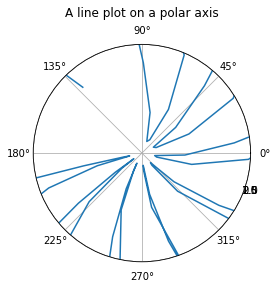

In [421]:
""""df_orig.plot(x="Cos_angle", y="Ratio", style='o')
plt.title('p/r v/s cos(teta)')
plt.xlabel('cos(teta)')
plt.ylabel('p/r')
plt.show()"""
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(df_orig['Ratio'], df_orig['Cos_angle'])
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * df_orig['Ratio']**2
colors = df_orig['Cos_angle']

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter( df_orig['Cos_angle'], df_orig['Ratio'], c=colors, s=area, cmap='hsv', alpha=0.75)

ax.set_rorigin(-2.5)
ax.set_theta_zero_location('W', offset=10)

In [ ]:
regressor = ElasticNet(random_state=0)
x_train = np.array(df_orig['Cos_angle'])
y_train = np.array(df_orig['Ratio'])
distance = np.array(df_orig['SC_Distance'])
x_train.reshape(-1, 1)
y_train.reshape(-1, 1)
regressor.fit(z,ratio)
w=regressor.intercept_
print(abs(w))

In [424]:
def test(c,e):
    #return ((-r*c) +math.sqrt(((r**2)*(c**2))-4*a*r - 4*a*(r**2)))/(2*a)
    return p*(1-(e**2))/(1+e*c)

In [425]:
param, param_cov = curve_fit(test,x_train, distance)

In [426]:
print("Eccentricity of the keplar orbit of the comet = "+str(param[0]/10000))
print("Since eccentricity 0 < e < 1 => The orbit of the comet must be elliptical")

Eccentricity of the keplar orbit of the comet = 0.25383826745224247
Since eccentricity 0 < e < 1 => The orbit of the comet must be elliptical


In [427]:
eccentricity = param[0]/10000
aphelion = p*(1-eccentricity)/(R*1000)
print("Aphelion = " + str(aphelion) + " km" )

Aphelion = 223248.68832410927 km


In [428]:
Perhelion = p*(1+0.507676)/(1000*R) #in Km
print("Perhelion = " + str(Perhelion) + " km" )

Perhelion = 451090.7953808751 km
